In [20]:
import pandas as pd
import gstlearn as gl
import gstlearn.plot as gp
import gstlearn.document as gdoc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
gdoc.setNoScroll()

data = 'data/pdh_data.parquet'

<IPython.core.display.Javascript object>

In [6]:
df = pd.read_parquet(data)
df

,category,lat,lon,name,city,country,type,sector,source_type,source_text,source_url,dataset_id,dataset_name,pfas_values,unit,pfas_sum,details,matrix,date,year
0,Known PFAS user,52.504114,-0.682637,3F,Corby,United Kingdom,Industrial site,None,Company website,3F,https://www.3fff.co.uk/,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
1,Known PFAS user,50.871865,6.034522,3M,Kerkrade,Netherlands,Industrial site,Manufacture of rubber and plastic products,Company website,3M,https://www.3mdeutschland.de/3M/de_DE/presse-d...,0,Known_PFAS_User_List,[],ng/l,NaN,"{""maps_link"": ""https://goo.gl/maps/z5dYoRaZxkK...",None,None,NaN
2,Known PFAS user,50.223409,8.765597,3P - Performance Plastics Products,Karben,Germany,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.3pcorporate.com//wp-content/upload...,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
3,Known PFAS user,47.858601,5.347156,3P Performance Plastics Products,Langres,France,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.haute-marne.gouv.fr/content/downlo...,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
4,Known PFAS user,39.471674,-0.538828,3P Productos Plásticos Performantes,Valencia,Spain,Industrial site,Manufacture of rubber and plastic products,Company website,3P,https://www.3pcorporate.com//wp-content/upload...,0,Known_PFAS_User_List,[],ng/l,NaN,{},None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478045,Known,52.245160,7.337400,WW.Offlum.019,Neuenkirchen,Germany,Sampling location,None,Authorities,"Database ELWAS | Landesamt für Natur, Umwelt u...",https://www.opengeodata.nrw.de/produkte/umwelt...,130,DE_NRW_Grundwasser,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,9.94,"{""messstelle_id"": 113710185, ""messprogramm"": ""...",Groundwater,2024-04-23,2024.0
478046,Known,51.940830,8.045450,WW.Vohren.Dackmar.54,Warendorf,Germany,Sampling location,None,Authorities,"Database ELWAS | Landesamt für Natur, Umwelt u...",https://www.opengeodata.nrw.de/produkte/umwelt...,130,DE_NRW_Grundwasser,"[{""cas_id"": ""335-76-2"", ""unit"": ""ng/l"", ""subst...",ng/l,0.00,"{""messstelle_id"": 113014041, ""messprogramm"": ""...",Groundwater,2017-11-16,2017.0
478047,Known,51.060010,7.027150,Westermann Lev EB 9,Leverkusen,Germany,Sampling location,None,Authorities,"Database ELWAS | Landesamt für Natur, Umwelt u...",https://www.opengeodata.nrw.de/produkte/umwelt...,130,DE_NRW_Grundwasser,"[{""cas_id"": ""375-73-5"", ""unit"": ""ng/l"", ""subst...",ng/l,93.00,"{""messstelle_id"": 76956805, ""messprogramm"": ""B...",Groundwater,2022-02-16,2022.0
478048,Known,51.025880,8.145160,Wolbecke,Kirchhundem,Germany,Sampling location,None,Authorities,"Database ELWAS | Landesamt für Natur, Umwelt u...",https://www.opengeodata.nrw.de/produkte/umwelt...,130,DE_NRW_Grundwasser,"[{""cas_id"": ""335-77-3"", ""unit"": ""ng/l"", ""subst...",ng/l,0.00,"{""messstelle_id"": 129660255, ""messprogramm"": ""...",Groundwater,2017-08-15,2017.0


In [11]:

df.category.unique()

array(['Known PFAS user', 'Presumptive', 'Known'], dtype=object)

In [18]:
df_num = df[df.category=='Known']
df_num = df_num.drop(['name','city','type','sector','source_type','source_text','source_url','dataset_name','details'],axis=1)
df_num_surf = df_num[df_num.matrix=='Surface water']
df_num_surf

,category,lat,lon,country,dataset_id,pfas_values,unit,pfas_sum,matrix,date,year
12991,Known,50.808932,3.352552,Belgium,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,130.00,Surface water,None,2018.0
12992,Known,51.016507,4.088303,Belgium,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,200.00,Surface water,None,2017.0
12993,Known,51.042282,3.548967,Belgium,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,42400.00,Surface water,None,2016.0
12994,Known,51.771554,6.605953,Germany,10,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,50.00,Surface water,None,2017.0
12995,Known,49.590101,7.603395,Germany,10,"[{""cas_id"": ""307-24-4"", ""unit"": ""ng/l"", ""subst...",ng/l,580.00,Surface water,None,2018.0
...,...,...,...,...,...,...,...,...,...,...,...
476204,Known,51.796320,0.190570,United Kingdom,129,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,35.18,Surface water,2023-04-28,2023.0
476205,Known,51.796320,0.190570,United Kingdom,129,"[{""cas_id"": ""335-24-0"", ""unit"": ""ng/l"", ""subst...",ng/l,120.50,Surface water,2023-08-09,2023.0
476206,Known,51.796320,0.190570,United Kingdom,129,"[{""cas_id"": ""2706-90-3"", ""unit"": ""ng/l"", ""subs...",ng/l,40.81,Surface water,2023-12-01,2023.0
476207,Known,51.658000,-1.422160,United Kingdom,129,"[{""cas_id"": ""375-22-4"", ""unit"": ""ng/l"", ""subst...",ng/l,3.45,Surface water,2023-04-24,2023.0


In [28]:
df_num_surf_france = df_num_surf[df_num_surf.country == 'France']

lat_min, lat_max = 41.0, 51.2
lon_min, lon_max = -5.1, 9.6 # On ne veut que la France métropolitaine

df_num_surf_france = df_num_surf_france[(df_num_surf_france['lat'] >= lat_min) & (df_num_surf_france['lat'] <= lat_max) & 
               (df_num_surf_france['lon'] >= lon_min) & (df_num_surf_france['lon'] <= lon_max)]


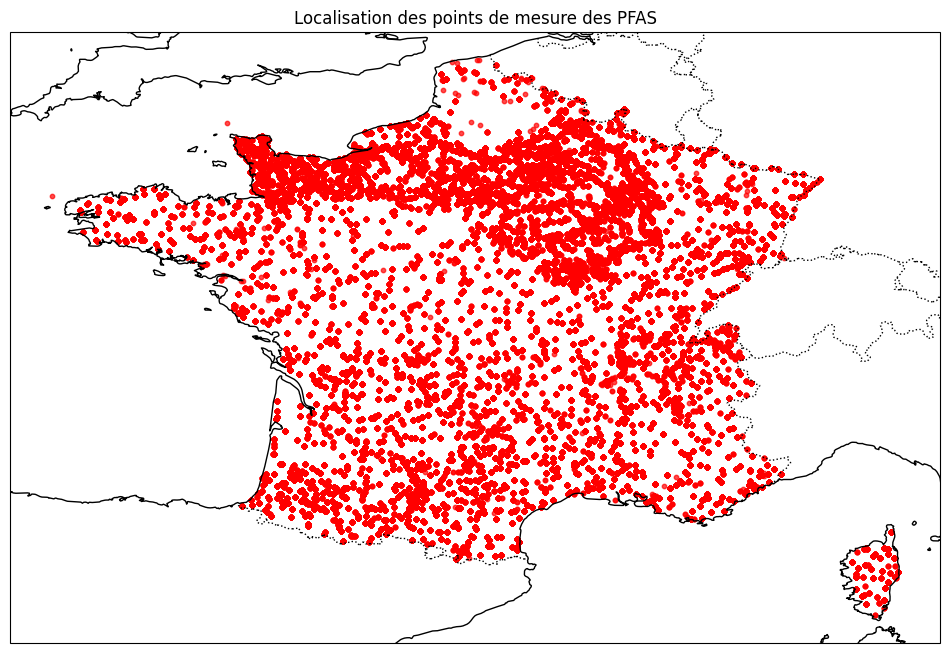

In [29]:
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Tracer les points de latitude et longitude
ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'], color='red', s=10, alpha=0.7, transform=ccrs.PlateCarree())

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')
plt.show()

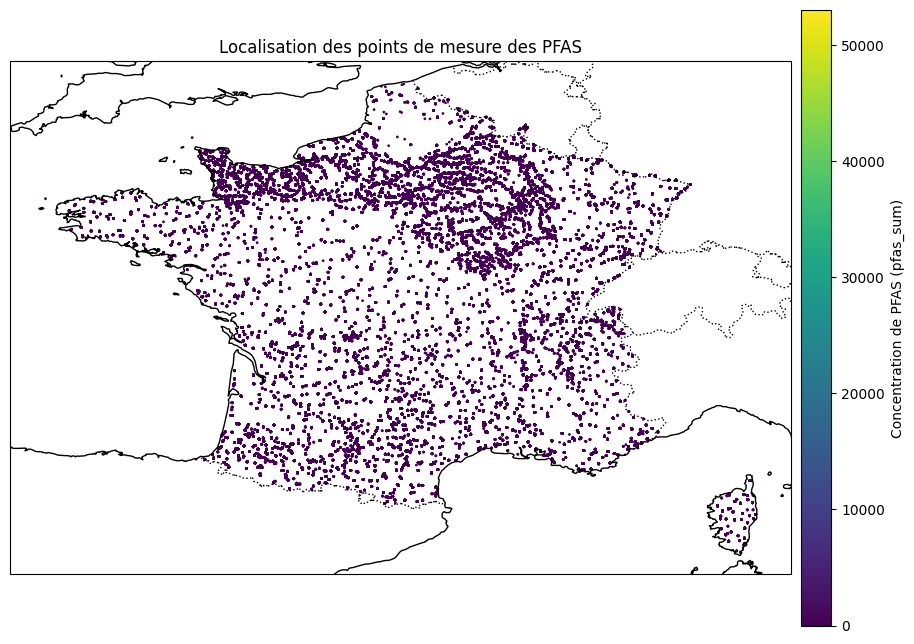

In [37]:
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de sum_pfas pour colorer les points
values = df_num_surf_france['pfas_sum']

# Tracer les points de latitude et longitude avec une coloration selon sum_pfas
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=1, alpha=1, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')
plt.show()

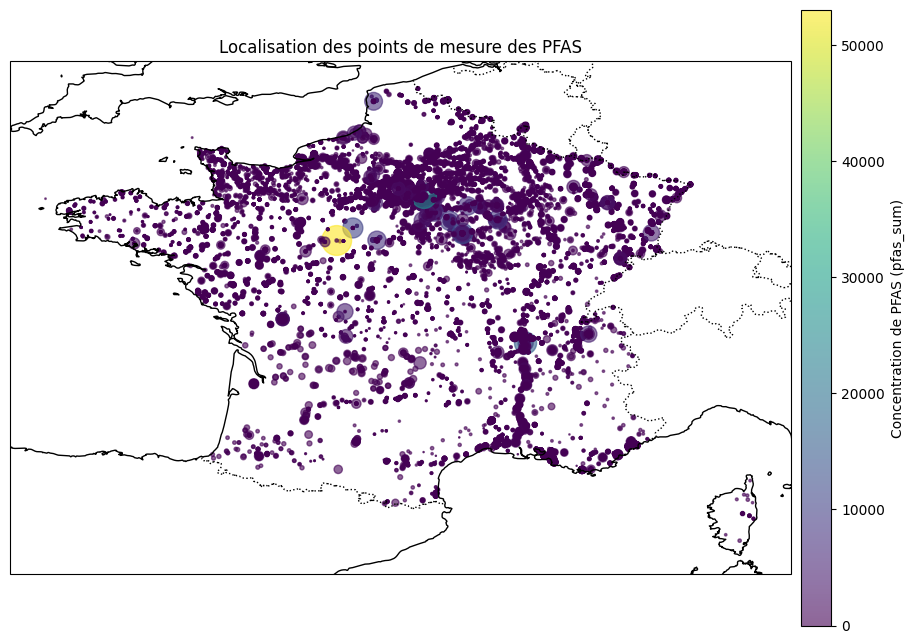

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de pfas_sum pour la couleur et la taille des points
values = df_num_surf_france['pfas_sum']

# Définir une échelle de taille en fonction de pfas_sum
# On utilise une transformation (racine carrée) pour éviter que les points ne deviennent trop grands
sizes = 2 * np.sqrt(values)  # Ajuster le coefficient (ici 20) pour changer l'échelle globale des tailles

# Tracer les points de latitude et longitude avec une coloration et une taille dépendant de pfas_sum
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=sizes, alpha=0.6, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')

# Afficher la figure
plt.show()


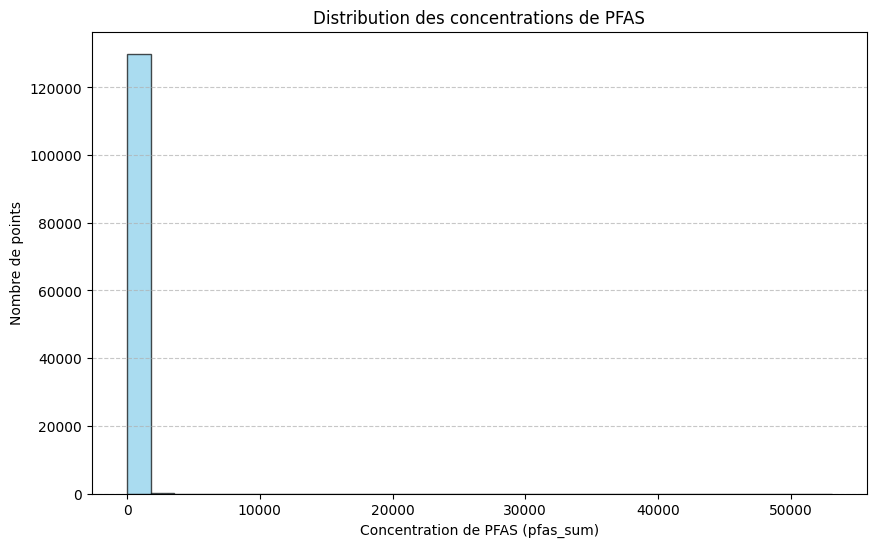

In [42]:

# Définir les valeurs de pfas_sum à partir du DataFrame
values = df_num_surf_france['pfas_sum']

# Créer l'histogramme avec 10 classes (bins)
plt.figure(figsize=(10, 6))
plt.hist(values, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Ajouter des labels et un titre
plt.xlabel('Concentration de PFAS (pfas_sum)')
plt.ylabel('Nombre de points')
plt.title('Distribution des concentrations de PFAS')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Afficher l'histogramme
plt.show()

In [45]:

# Calculer le 99ème percentile
percentile_99 = np.percentile(values, 99)

# Afficher le résultat
print(f"Le 99ème percentile des concentrations de PFAS est : {percentile_95}")

Le 95ème percentile des concentrations de PFAS est : 109.97599999999947


### Seuillage

In [59]:
# On fixe les valeurs aberrantes à 110 pour la lisibilité
df_num_surf_france['pfas_sum'] = np.clip(df_num_surf_france['pfas_sum'], None, 110)

# Afficher un aperçu des données mises à jour
df_num_surf_france.head()

,category,lat,lon,country,dataset_id,pfas_values,unit,pfas_sum,matrix,date,year
13537,Known,42.444155,2.161042,France,12,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,110.00,Surface water,None,2010.0
13563,Known,43.199694,5.870111,France,12,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,0.09,Surface water,None,2009.0
13564,Known,43.199694,5.870111,France,12,"[{""cas_id"": ""355-46-4"", ""unit"": ""ng/l"", ""subst...",ng/l,0.01,Surface water,None,2009.0
13572,Known,43.291111,2.989250,France,12,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,0.16,Surface water,None,2009.0
13573,Known,43.291111,2.989250,France,12,"[{""cas_id"": ""1763-23-1"", ""unit"": ""ng/l"", ""subs...",ng/l,0.02,Surface water,None,2009.0


In [73]:
%matplotlib qt
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de pfas_sum pour la couleur et la taille des points
values = df_num_surf_france['pfas_sum']

# Définir une échelle de taille en fonction de pfas_sum
# On utilise une transformation (racine carrée) pour éviter que les points ne deviennent trop grands
sizes = 2 * np.sqrt(values)  # Ajuster le coefficient (ici 20) pour changer l'échelle globale des tailles

# Tracer les points de latitude et longitude avec une coloration et une taille dépendant de pfas_sum
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=sizes, alpha=0.6, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')

# Afficher la figure
plt.show()


### Suppression des doublons les plus faibles

In [72]:
# Longueur initiale du DataFrame
initial_length = len(df_num_surf_france)

# Trier le DataFrame par latitude, longitude et pfas_sum (par ordre décroissant)
df_num_surf_france = df_num_surf_france.sort_values(by=['lat', 'lon', 'pfas_sum'], ascending=[True, True, False])

# Supprimer les doublons basés sur lat et lon, en gardant uniquement la première occurrence (valeur de pfas_sum la plus élevée)
df_num_surf_france = df_num_surf_france.drop_duplicates(subset=['lat', 'lon'], keep='first')

# Longueur après suppression des doublons
final_length = len(df_num_surf_france)

# Calculer et afficher le nombre de doublons supprimés
duplicates_removed = initial_length - final_length
print(f"Nombre de doublons supprimés : {duplicates_removed}")


Nombre de doublons supprimés : 125235


In [54]:
np.sort(df_num_surf_france.year.unique())

array([2005., 2006., 2008., 2009., 2010., 2011., 2012., 2013., 2014.,
       2015., 2016., 2017., 2018., 2019., 2020., 2021., 2022., 2023.,
       2024.])

In [74]:
%matplotlib qt
# Créer la figure et les axes avec la projection appropriée
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Ajouter des traits côtiers et des frontières pour un meilleur contexte géographique
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Définir les valeurs de pfas_sum pour la couleur et la taille des points
values = df_num_surf_france['pfas_sum']

# Définir une échelle de taille en fonction de pfas_sum
# On utilise une transformation (racine carrée) pour éviter que les points ne deviennent trop grands
sizes = 2 * np.sqrt(values)  # Ajuster le coefficient (ici 20) pour changer l'échelle globale des tailles

# Tracer les points de latitude et longitude avec une coloration et une taille dépendant de pfas_sum
scatter = ax.scatter(df_num_surf_france['lon'], df_num_surf_france['lat'],
                     c=values, cmap='viridis', s=sizes, alpha=0.6, transform=ccrs.PlateCarree())

# Ajouter une barre de couleur pour indiquer les valeurs de concentration des PFAS
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', pad=0.01)
cbar.set_label('Concentration de PFAS (pfas_sum)')

# Ajouter des labels et un titre
ax.set_title('Localisation des points de mesure des PFAS')

# Afficher la figure
plt.show()


In [75]:
df_num_surf_france.to_parquet("pfas_france_pretraite.parquet")

In [76]:
df_num_surf_france

,category,lat,lon,country,dataset_id,pfas_values,unit,pfas_sum,matrix,date,year
342134,Known,41.458298,9.145714,France,29,"[{""cas_id"": ""375-22-4"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2018-03-15,2018.0
325566,Known,41.576726,9.291149,France,29,"[{""cas_id"": ""376-06-7"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2014-01-15,2014.0
325433,Known,41.655659,8.981629,France,29,"[{""cas_id"": ""375-22-4"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2016-01-14,2016.0
342128,Known,41.667497,9.206354,France,29,"[{""cas_id"": ""307-24-4"", ""unit"": ""ng/l"", ""subst...",ng/l,9.0,Surface water,2020-06-10,2020.0
325521,Known,41.718255,9.303876,France,29,"[{""cas_id"": ""376-06-7"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2014-01-13,2014.0
...,...,...,...,...,...,...,...,...,...,...,...
197792,Known,50.920182,2.622923,France,29,"[{""cas_id"": ""307-24-4"", ""unit"": ""ng/l"", ""subst...",ng/l,11.7,Surface water,2022-08-22,2022.0
197403,Known,50.954702,1.955888,France,29,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2010-06-23,2010.0
197858,Known,50.966087,1.874074,France,29,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2010-06-23,2010.0
197404,Known,50.999365,2.293940,France,29,"[{""cas_id"": ""335-67-1"", ""unit"": ""ng/l"", ""subst...",ng/l,0.0,Surface water,2010-06-23,2010.0
